# Comparing the variance on different movies

## Setup

In [4]:
from amftrack.util.sys import storage_path
from amftrack.util.plot import (
    show_image,
    show_image_with_segment,
)
from amftrack.util.video_analysis import (
    extract_kymograph,
    variance_over_time_on_segment)
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

from skimage.measure import profile_line

#%matplotlib notebook

### Defining the region

In [5]:
image_path = os.path.join(
    storage_path,
    "width2/variation_analysis/20220324_Plate907_054/Img/Basler_acA4112-30um__40044625__20220324_131604024_0001.tiff",
)

In [6]:
im = image.imread(image_path)
print(im.shape)

(3000, 4096)


In [7]:
x1, y1 = 2200, 1650
x2, y2 = 2200, 2300

In [8]:
np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

650.0

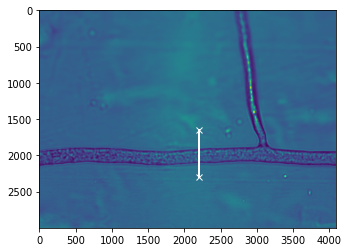

In [10]:
show_image_with_segment(image_path, y1, x1, y2, x2)

### Extract profile

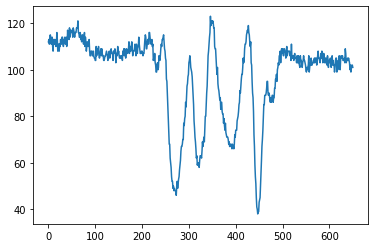

In [11]:
profile = profile_line(
    im, src=[y1, x1], dst=[y2, x2], linewidth=1
)  # careful with (y, x) and not (x, y)
plt.plot(list(range(len(profile))), profile)

In [12]:
profile.shape

(651,)

## Debug

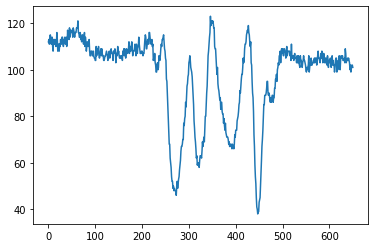

In [13]:
plt.plot(list(range(len(profile))), profile)
plt.show()

## Extraction from different movies

In [14]:
movies = ["movie_054_0", "movie_054_1", "movie_054_2", "20220324_Plate907_054/Img"]
movie_path = [
    os.path.join(os.path.join(storage_path, "width2/variation_analysis/"), movies[i])
    for i in range(len(movies))
]

2022-06-22 16:24:06,004-[INFO]- root:41 -> Number of images handled: 60
2022-06-22 16:24:19,913-[INFO]- root:41 -> Number of images handled: 60
2022-06-22 16:24:34,242-[INFO]- root:41 -> Number of images handled: 60
2022-06-22 16:26:50,733-[INFO]- root:41 -> Number of images handled: 601


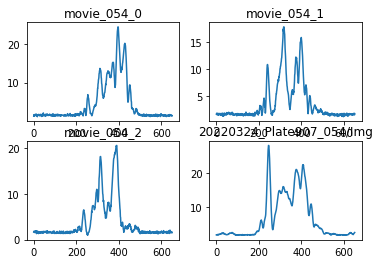

In [19]:
l = []
for i, path in enumerate(movie_path):
    variance_on_segment = variance_over_time_on_segment(path, y1, x1, y2, x2)
    l.append(variance_on_segment)
    plt.subplot(2, 2, i + 1)
    plt.plot(variance_on_segment)
    plt.title(movies[i])

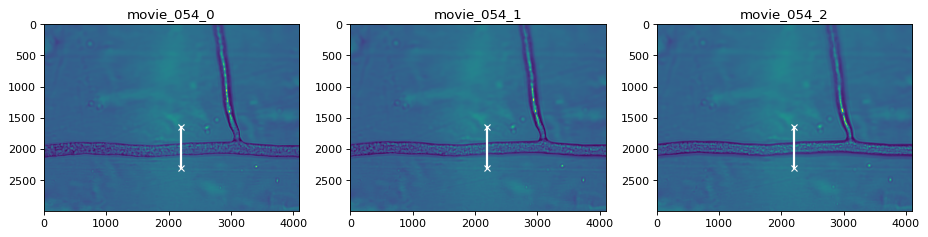

In [16]:
from matplotlib.pyplot import figure

figure(figsize=(14, 8), dpi=80)

for i in range(len(movie_path) - 1):
    plt.subplot(1, 3, i + 1)
    image_path = os.path.join(movie_path[i], os.listdir(movie_path[i])[0])
    show_image_with_segment(image_path, y1, x1, y2, x2)
    plt.title(movies[i])

In [17]:
print(len(l))
print(len(l[0]))

4
651


## Trying different filters

### First try

Paramètres: 5, 3 très bien

In [18]:
from scipy.signal import savgol_filter

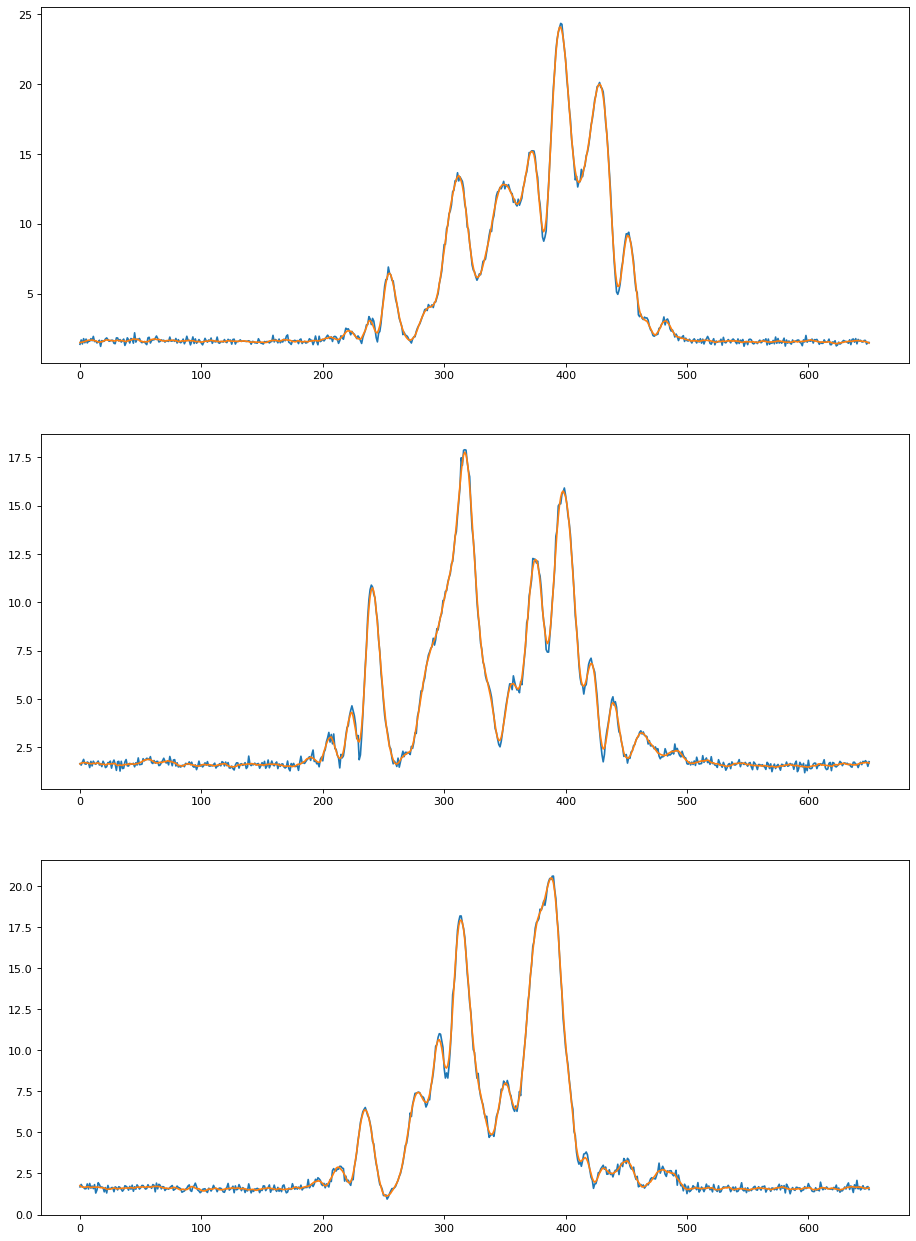

In [20]:
np.set_printoptions(precision=2)  # For compact display.
plt.figure(figsize=(14, 20), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(l[i])
    new = savgol_filter(l[i], window_length=15, polyorder=3)
    plt.plot(new)

### Trying sets of parameters

In [21]:
params = {"w": [50, 100, 200], "p": [3, 3, 3]}

In [22]:
result = []

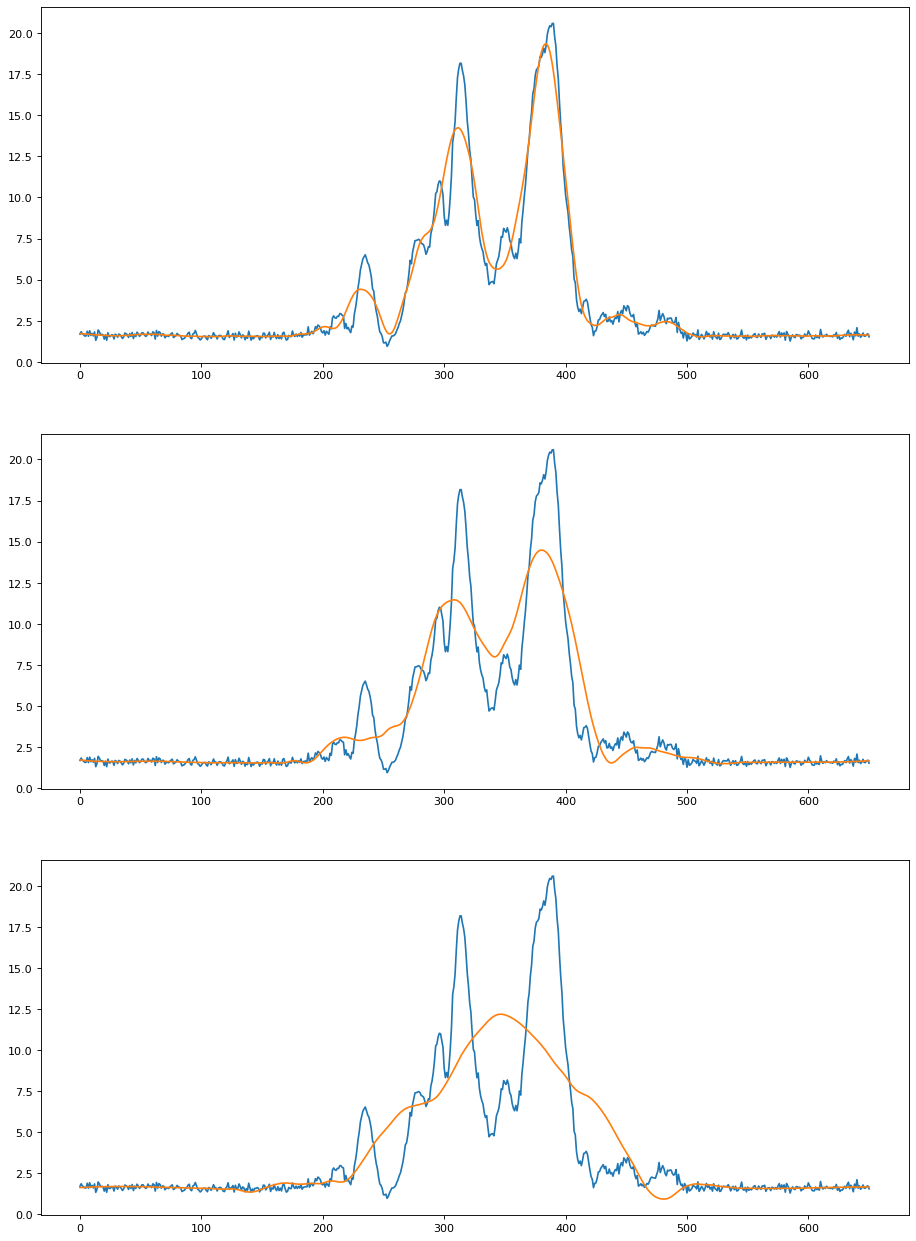

In [23]:
np.set_printoptions(precision=2)  # For compact display.
plt.figure(figsize=(14, 20), dpi=80)
j = 2
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(l[j])
    new = savgol_filter(l[j], window_length=params["w"][i], polyorder=params["p"][i])
    result.append(new)
    plt.plot(new)

### Effet seuil

In [60]:
seuil = [result[i] > 3.0 for i in range(len(result))]

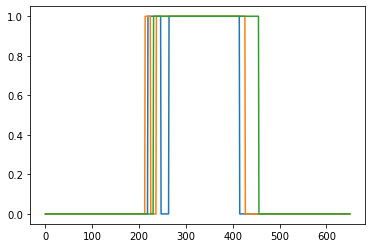

In [61]:
for i in range(len(seuil)):
    plt.plot(seuil[i])

### Effet seuil sur une longue vidéo

<IPython.core.display.Javascript object>


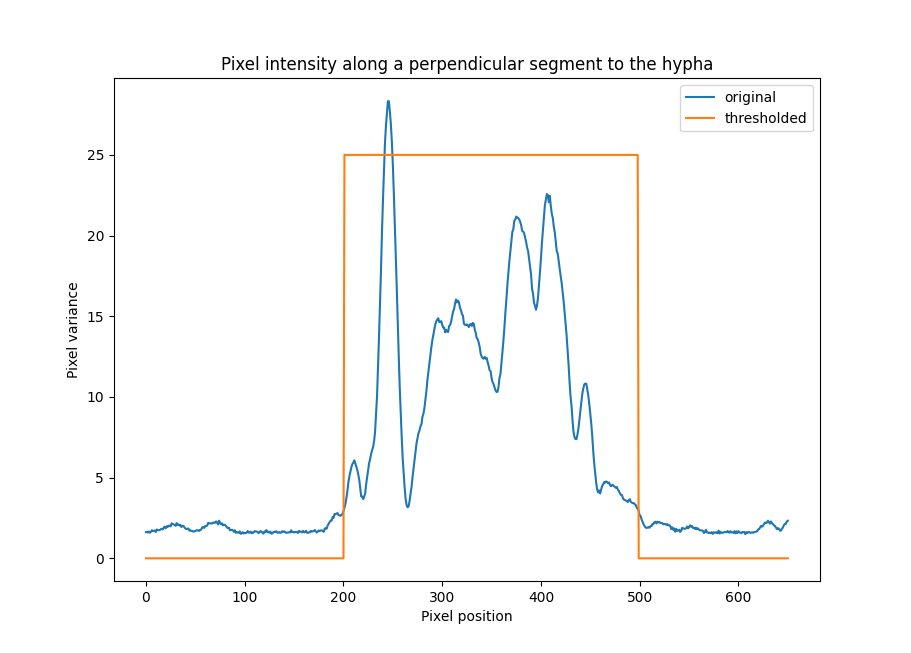

Text(0.5, 1.0, 'Pixel intensity along a perpendicular segment to the hypha')

In [54]:
%matplotlib notebook

plt.plot(l[3], label = "original")
new = savgol_filter(l[3], window_length=100, polyorder=3)
seuil = l[3] > 3.0
plt.plot(seuil*25, label = "thresholded")
# plt.plot(new, label = "smoothed (sav-gol filter)")
plt.legend()
plt.ylabel("Pixel variance")
plt.xlabel("Pixel position")
plt.title("Pixel intensity along a perpendicular segment to the hypha")